# Simulasi Interaksi Predator-Mangsa dengan Model Lotka-Volterra


## Teori

Model Lotka-Volterra, juga dikenal sebagai model predator-mangsa, adalah suatu model matematika yang digunakan untuk menggambarkan interaksi antara populasi mangsa dan predator dalam suatu ekosistem. Model ini dikembangkan oleh dua ilmuwan, Alfred J. Lotka dan Vito Volterra, pada awal abad ke-20.

### Variabel dan Parameter



Dalam model Lotka-Volterra, terdapat dua variabel utama yang mewakili populasi predator dan mangsa pada suatu waktu tertentu:
- `prey`: Populasi mangsa pada waktu t.
- `predator`: Populasi predator pada waktu t.

Sementara itu, terdapat beberapa parameter yang mempengaruhi pertumbuhan dan interaksi kedua populasi:
- `alpha`: Laju pertumbuhan mangsa tanpa predator. Jumlah populasi mangsa akan meningkat seiring waktu jika tidak ada predator.
- `beta`: Laju predasi. Menunjukkan seberapa efisien predator dalam memangsa mangsa.
- `gamma`: Laju kematian predator tanpa mangsa. Jumlah populasi predator akan menurun seiring waktu jika tidak ada mangsa.
- `delta`: Efisiensi konversi mangsa menjadi predator. Menunjukkan berapa banyak mangsa yang dibutuhkan untuk menghasilkan satu predator baru.
- `time_steps`: Jumlah langkah waktu simulasi yang akan dijalankan.

### Persamaan Lotka-Volterra


Model ini didasarkan pada sistem persamaan diferensial yang menggambarkan bagaimana populasi predator dan mangsa berubah dari waktu ke waktu:


Persamaan untuk populasi mangsa:
`prey_next = prey + alpha * prey - beta * prey * predator`

Persamaan untuk populasi predator:
`predator_next = predator + delta * prey * predator - gamma * predator`

In [125]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [135]:
# Set opsi tampilan pandas untuk mencetak DataFrame tanpa pembatasan
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [134]:
# Fungsi Lotka-Volterra
def lotka_volterra(prey, predator, alpha, beta, gamma, delta, time_steps):
    prey_population = [prey]
    predator_population = [predator]

    for t in range(1, time_steps):
        prey_next = prey + alpha * prey - beta * prey * predator
        predator_next = predator + delta * prey * predator - gamma * predator

        prey = max(prey_next, 0)
        predator = max(predator_next, 0)

        prey_population.append(prey)
        predator_population.append(predator)

    return prey_population, predator_population

In [136]:
# Definisi struktur parameter model Lotka-Volterra
parameters = [
    # TODO: Balanced
    {'alpha': 0.2, 'beta': 0.02, 'gamma': 0.2, 'delta': 0.02, 'label': 'Balanced'},
    
    # TODO: Rapid Growth of Prey
    {'alpha': 0.3, 'beta': 0.05, 'gamma': 0.2, 'delta': 0.02, 'label': 'Rapid Growth of Prey'},
    
    # TODO: Inefficient Predation
    {'alpha': 0.1, 'beta': 0.01, 'gamma': 0.4, 'delta': 0.005, 'label': 'Inefficient Predation'},
    
    # TODO: Predator Dominance
    {'alpha': 0.05, 'beta': 0.1, 'gamma': 0.1, 'delta': 0.02, 'label': 'Predator Dominance'},
    
    # TODO: Prey Dominance
    {'alpha': 0.3, 'beta': 0.01, 'gamma': 0.2, 'delta': 0.01, 'label': 'Prey Dominance'},
    
    # TODO: Stable Equilibrium
    {'alpha': 0.1, 'beta': 0.02, 'gamma': 0.1, 'delta': 0.01, 'label': 'Stable Equilibrium'},
    
    # TODO: High Prey and Low Predator
    {'alpha': 0.3, 'beta': 0.01, 'gamma': 0.1, 'delta': 0.005, 'label': 'High Prey and Low Predator'},
    
    # TODO: Low Prey and High Predator
    {'alpha': 0.05, 'beta': 0.05, 'gamma': 0.3, 'delta': 0.02, 'label': 'Low Prey and High Predator'},
    
    # TODO: Low Initial Prey Population
    {'prey_initial': 50, 'predator_initial': 10, 'alpha': 0.1, 'beta': 0.02, 'gamma': 0.3, 'delta': 0.01, 'label': 'Low Initial Prey Population'},
    
    # TODO: High Initial Predator Population
    {'prey_initial': 100, 'predator_initial': 30, 'alpha': 0.1, 'beta': 0.02, 'gamma': 0.3, 'delta': 0.01, 'label': 'High Initial Predator Population'}
]


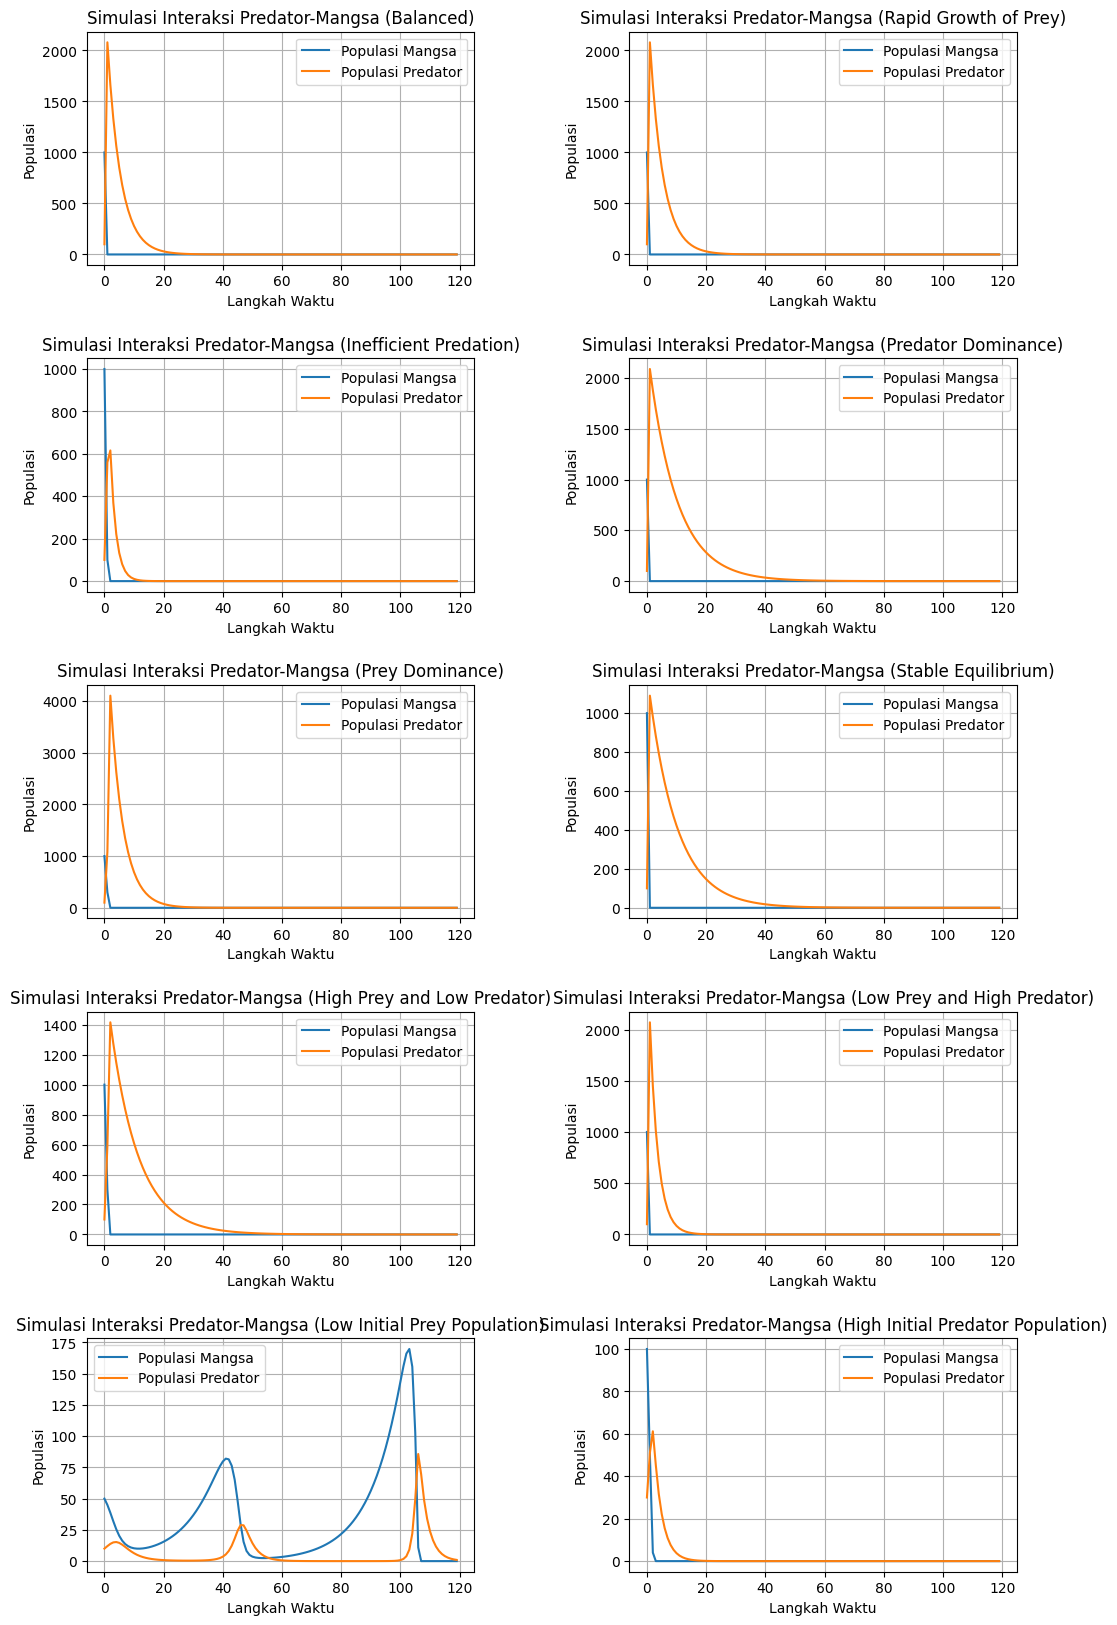

In [139]:
# Buat subplot untuk menampilkan plot secara terorganisir
num_rows = 5
num_cols = 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 20))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Jalankan simulasi dengan setiap struktur parameter
for i, param in enumerate(parameters):
    # Parameter simulasi
    prey_initial = param.get('prey_initial', 1000)
    predator_initial = param.get('predator_initial', 100)
    alpha = param['alpha']
    beta = param['beta']
    gamma = param['gamma']
    delta = param['delta']

    time_steps = 120  # Jumlah langkah waktu simulasi

    # Jalankan simulasi
    prey_population, predator_population = lotka_volterra(prey_initial, predator_initial, alpha, beta, gamma, delta, time_steps)

    # Buat DataFrame dari hasil simulasi
    df = pd.DataFrame({'Prey Population': prey_population, 'Predator Population': predator_population})

    # Plot hasil simulasi pada subplot yang sesuai
    row = i // num_cols
    col = i % num_cols
    time = np.arange(time_steps)

    axes[row, col].plot(time, prey_population, label='Populasi Mangsa')
    axes[row, col].plot(time, predator_population, label='Populasi Predator')
    axes[row, col].set_xlabel('Langkah Waktu')
    axes[row, col].set_ylabel('Populasi')
    axes[row, col].set_title(f'Simulasi Interaksi Predator-Mangsa ({param["label"]})')
    axes[row, col].legend()
    axes[row, col].grid(True)

plt.show()

## Analogi Contoh

Untuk memahami maksud simulasi ini, mari kita gunakan analogi sederhana. Bayangkan sebuah pulau yang dihuni oleh kelinci sebagai mangsa dan rubah sebagai predator.

- Populasi kelinci (mangsa) pada awalnya adalah 100 ekor.
- Populasi rubah (predator) pada awalnya adalah 20 ekor.

1. Kelinci akan berkembang biak dengan cepat tanpa adanya rubah sebagai predator, sehingga laju pertumbuhan populasi kelinci tanpa predator (alpha) adalah 0.1. Namun, populasi kelinci akan berkurang ketika rubah memangsa (beta), dan efisiensi konversi kelinci menjadi rubah (delta) adalah 0.01.

2. Rubah, di sisi lain, membutuhkan kelinci sebagai sumber makanan utama. Tanpa adanya kelinci, rubah akan mati (gamma) dengan laju 0.3. Namun, ketika jumlah kelinci cukup banyak, rubah akan berkembang biak lebih cepat (delta) dengan laju 0.02.

3. Dalam simulasi ini, kita akan melihat bagaimana populasi kelinci dan rubah akan berubah dari waktu ke waktu sebagai hasil dari interaksi predator-mangsa ini.

4. Setelah simulasi selesai dijalankan, hasilnya akan ditampilkan dalam grafik dengan sumbu-x menunjukkan langkah waktu dan sumbu-y menunjukkan populasi kelinci (mangsa) dan rubah (predator). Grafik ini akan memperlihatkan bagaimana fluktuasi populasi kedua kelompok ini berubah seiring waktu dan bagaimana interaksi predator-mangsa mempengaruhi dinamika ekosistem di pulau tersebut.
